# Logistic Regression Pipeline
![alt text](Pipeline_Linear_Logistic_Regression.png "Title")

Import main libraries in order to work with.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Dataset is already splited in train and test. Let's take a look in the train dataset.

In [79]:
train = pd.read_csv('titanic_train.csv')

Let's see the first lines of the dataset and some information about it.

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we could notice, dataset has 891 rowns. However, there are some missing data in columns Age, Cabin and Embarked. Let's show a heatmap considering only missing data in order to get an overview about it.

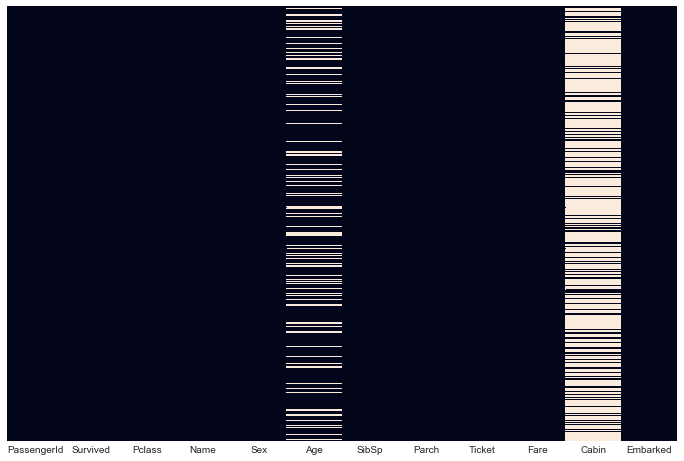

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False)

This way is much better to see missing data.

Making Exploratory Data Analysys (EDA)

In [83]:
sns.set_style('whitegrid')

Exploring data about passangers that Survived (value=1) or not (value=0) 

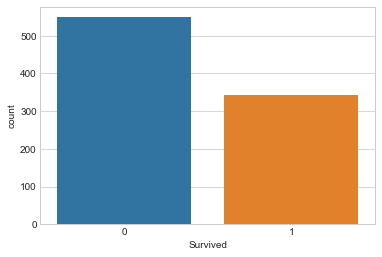

In [84]:
sns.countplot(data=train, x='Survived')

Let's go deeper and find out also information about men and women.

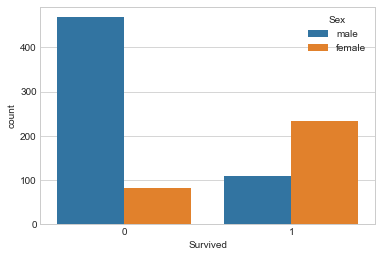

In [85]:
sns.countplot(data=train, x='Survived', hue='Sex')

We can see the number of women survived is bigger than men. 

Let's now check information considering the class of passanger instead of sex.

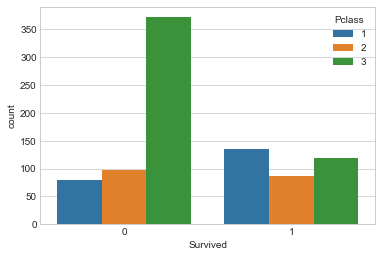

In [86]:
sns.countplot(data=train, x='Survived', hue='Pclass')

The third class is by far the one with the highest number of deaths.

Now we are going to check the Age of passengers.

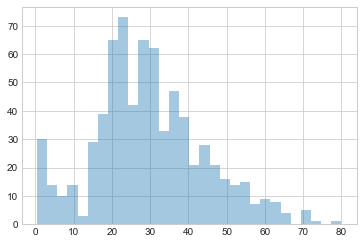

In [87]:
train['Age'].hist(bins=30, alpha=0.4)

We can see that there were some children, but the majority of passangers were adults from 18 to 65.

Now let's see whether passengers came accompained or not.

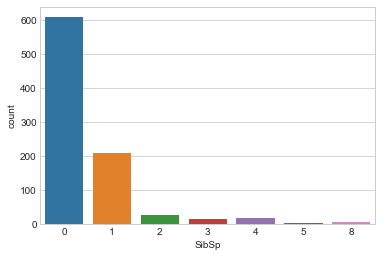

In [88]:
sns.countplot(data=train, x='SibSp')

The majority came alone or with just one person (sibling, friend, etc).

Let's check the age of unaccompanied people.

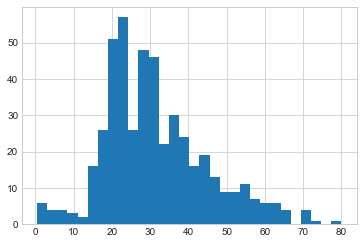

In [89]:
train[train['SibSp']==0]['Age'].hist(bins=30)

Now let's check about the fares paid.

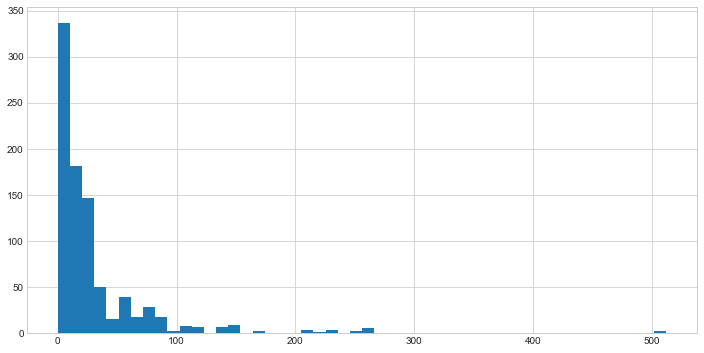

In [90]:
train['Fare'].hist(bins=50, figsize=(12,6))

The majority had paid less than 100 dollars per ticket. Let's see more specific information.

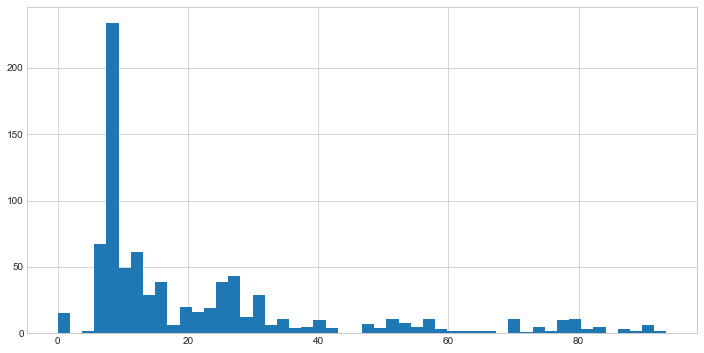

In [91]:
train[train['Fare']<100]['Fare'].hist(bins=50, figsize=(12,6))

Uau!!! More than 200 people paid less than 20 dollars. What a bargain!!! But remember... It was in 1912.

Now let's deal with missing data. Boxplot will help us to see the distribution and variance of data.

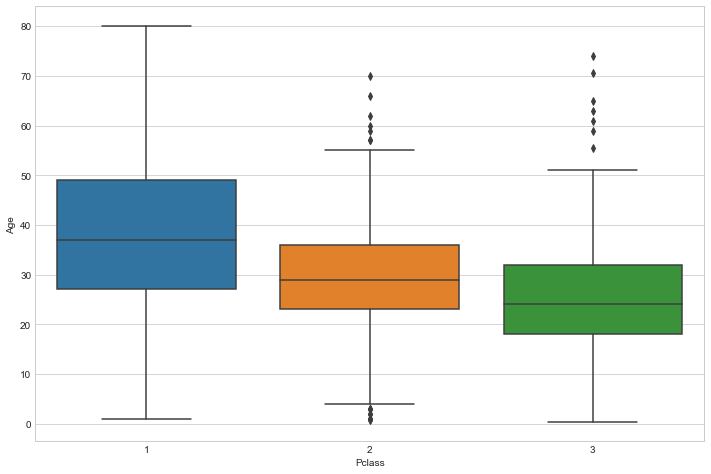

In [92]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=train)

Here we can see that passangers that travaled in fisrt class are older than other passangers. And third class have the youngest.

There are some strategies in order to deal with missing data (e.g., delete rows with missing data; using the mean of the column; and filling missing data with the last previous value in the column.)

For each class, let's use the mean of the column Age to deal with missing data. Let's print each mean.

In [93]:
print(train[train['Pclass']==1]['Age'].mean())
print(train[train['Pclass']==2]['Age'].mean())
print(train[train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


Now we are going to define a function to get the class and age. If Age is null, the function will calculate the mean for that specific class and return. Otherwise, the real age will be returned.

In [94]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return train[train['Pclass']==Pclass]['Age'].mean()
    else:
        return Age

In [95]:
train['Age'] = train[['Age','Pclass']].apply(input_age, axis=1)

Checking whether there still have missing data for age.

In [96]:
train['Age'].isnull().sum()

0

As the column Cabin is not so important, let's just drop it.

In [97]:
train.drop('Cabin', axis=1, inplace=True)

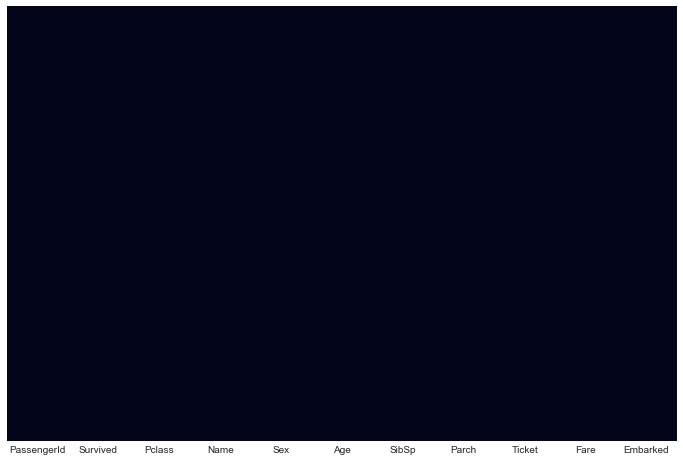

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False)

Now everything look nice!!! Go ahead!

Now we are looking at categorical variables (Sex, Embarked). It's important to transform them in integers in order to help model work well. We are going to use "dummie" approach. 

In [99]:
sex = pd.get_dummies(train['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [100]:
embark = pd.get_dummies(train['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Now, let's drop unnecessary columns. 

In [101]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [102]:
train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [103]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


And finally, concatenate two new columns lately created.

In [104]:
train = pd.concat([train, sex, embark], axis=1)  # axis=1 means concatenating columns.

In [105]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0


It's time to use Machine Learning! For this case we are going to use Logist Regression.

First - Split data in train and test.

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

As train data, instead of write the name of all columns, let's just drop the column 'Survived'. As the parameter inplace is False by default, the drop isn't actually applied in the dataset.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

Second - Instantiating model

In [108]:
logmodel = LogisticRegression()

Third - Fit the model

In [111]:
logmodel.fit(X_train, y_train)

C:\Users\Afonso\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fourth - Predicting based on test data

In [112]:
predict = logmodel.predict(X_test)

And last, but not least - Checking how good the model was

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       161
           1       0.77      0.65      0.71       107

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



We can also use confusion matrix

In [115]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[140  21]
 [ 37  70]]


Thus, our model predicted with 79% precision for passengers that died and 77% precision for passengers that survived.

You can also consider some column that were drop, and check whether the model performed better or not.